# Visualizing High Dimensional Data with PCA

An obvious problem with data with many dimensions is that making good visuals is challenging! You can isolate one or two features at a time with scatterplots and the like, but how can you get a visualization that incorporates all of the different features at once? An obvious approach is to project the datapoints onto a 2D plane, but which do you pick? PCA helps by telling you exactly which 2D plane will produce the "most spread" in the data, in the sense of maximizing the variance of the datapoints. 

This notebook produces some random datapoints in space by randomly generating some means and variances and sampling from a multivariate normal for each means and variance combo. Then it computes which 2D plane will make the best looking picture and shows the plot.

For comparison, you can also view the results when we just project onto the first two axes. If you roll a few times, it should be visually apparent that the PCA plane, on average, does a better job of separating the data out.

In [183]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import expon
import pandas as pd

In [184]:
# parameters - feel free to alter them

# dimension of space to work in
p = 20

# number of samples per group
n = 100

# number of groups
g = 5



In [185]:
# Create some toy data 

# step 1: generate the means for the various groups
def roll():
    means = np.array([])
    for i in range(g):
        means = np.append(means, multivariate_normal.rvs(np.zeros(p)), axis = 0)
    means = means.reshape(g,p)

    # step 2: generate the variances for the various groups
    variances = np.array([])
    for i in range(g):
        variances = np.append(variances, np.array([expon.rvs()]), axis=0)

    # step 3: populate the groups and add a dummy column for the intercept
    data = pd.DataFrame(columns=list(map(str,range(p)))+['int dummy','group'])
    data.head()

    for i in range(n):
        for group in range(g):
            data.loc[i*g+group,] = np.append(multivariate_normal.rvs(mean = means[group], cov = variances[group]),[1,group],axis=0)
    data = data.astype('float')
    return data

In [186]:
# Now that we have some data, we can do PCA on it!

def PCA_show(data, showbad = False):
    # recast data as numpy matrix
    X = np.array(data.loc[:,map(str,range(p))], dtype='float')

    # get SVD decomp
    u,s,vh = np.linalg.svd(X, full_matrices = False)

    # this matrix contains the coordinates of the data points, transformed to the SVD basis
    u*s
    x_data = pd.DataFrame(u*s, index = data.index)
    x_data['group'] = data['group']
    x_data.plot.scatter(x = 0, y = 1, c = 'group', cmap='Accent')
    plt.title("PCA plane")
    if showbad:
        data.plot.scatter(x = '0' , y= '1', c='group', cmap='Accent')
        plt.title("(x_0, x_1) plane")
    

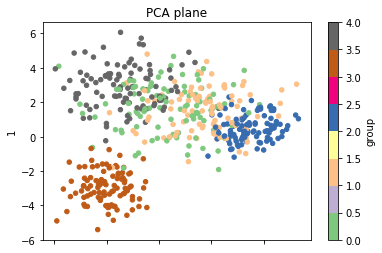

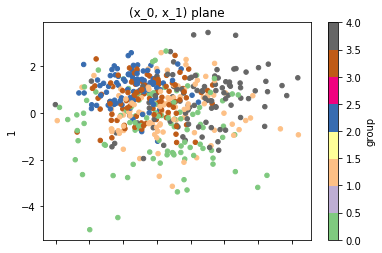

In [187]:
# now you can just reload this one cell to make different plots and see what happens!
PCA_show(roll(), True)